# 恒星の真の明るさと表面温度の関係（[ヘルツシュプルング・ラッセル図; HR図](https://ja.wikipedia.org/wiki/ヘルツシュプルング・ラッセル図)の作成）


*   元データは Gaia archive https://gea.esac.esa.int/archive/ から取得
*   50pc以内の恒星で、年周視差（parallax）の測定精度が一定以上良く、かつ見かけの等級が一定以上明るいもの



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 日本語も使えるようにしておく。
!pip install japanize_matplotlib
import japanize_matplotlib

データはこれまで通りpandasで読み込む。

In [3]:
import pandas as pd

In [4]:
d = pd.read_csv("gaia_data.csv")

In [5]:
d

,parallax,gaia_magnitude,teff
0,0.020000,10.433743,4375.807621
1,0.020001,11.261729,4028.302002
2,0.020002,13.941639,3117.494595
3,0.020002,9.583755,5088.062364
4,0.020002,13.561688,3240.484167
...,...,...,...
23196,0.374490,8.524133,14466.612723
23197,0.392753,6.551172,3481.136660
23198,0.415179,11.038391,2512.945046
23199,0.546976,8.193974,3050.173272


今までと同様に必要な列を取り出そう。

In [6]:
m = np.array(d["gaia_magnitude"]) # これは見かけの等級
parallax = np.array(d["parallax"]) # 年周視差（秒角）
teff = np.array(d["teff"]) # 温度（K）

見かけの等級と年周視差（parallax）から、真の明るさ$L$を計算する（講義スライド参照）。相対的な比較しかしないので比例定数は無視してよい。$10^x$は10**xと計算する。

In [7]:
L = 10**(-0.4*m) / parallax**2 # ( )を忘れないこと。つけないと10の-0.4乗がまず計算され、それにmがかかったものになる。

縦軸を$L$, 横軸を温度teffとして、**両対数グラフ**に点でプロットしてみよう。軸のラベルも適切につけること。横軸は慣習上左を大きく取る。plt.xlim(20000, 2000)などとしてみよう。点が多いのでマーカーサイズなども適宜調節して見やすくしよう。

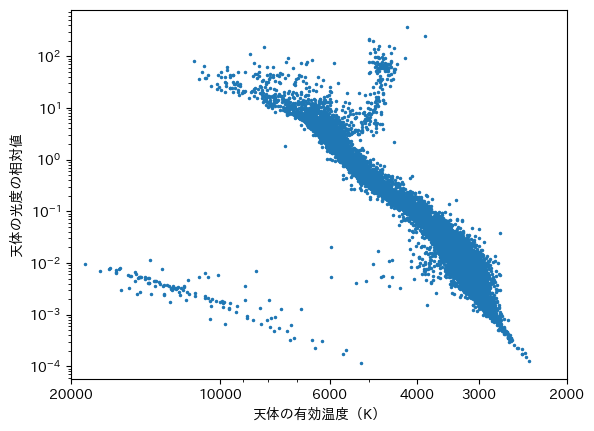

In [8]:
plt.xscale("log") # x軸を対数スケールにする
plt.yscale("log") # y軸も同様
plt.xlim(20000, 2000) # こうすると勝手に軸の左右も逆になる。左側を高温にとるのは天文学の慣習。
plt.plot(teff, L, '.', markersize=3)
plt.xlabel("天体の有効温度（K）") # ラベルには物理量と必要があれば単位も書く
plt.ylabel("天体の光度の相対値") # これは相対値なので単位は不要
plt.xticks([2e4, 1e4, 6e3, 4e3, 3e3, 2e3], [20000, 10000, 6000, 4000, 3000, 2000]); # x軸の目盛の表記を変更（一つ目の引数が位置、二つ目が変更した表記）

このグラフに太陽のデータを異なるマーカーで加えてみよう。このデータに対応する太陽の性質は、見かけの等級4.67, 年周視差は0.1秒角, 温度は5777Kである。

In [9]:
teff_sun = [5777.]
L_sun = [10**(-0.4*4.67) / 0.1**2] # 上と同じものを太陽についても計算する

<ipython-input-10-e5bf38b7c549>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(teff_sun, L_sun, '.', marker='$\odot$',  # マーカーには太陽のシンボルを使ってみた


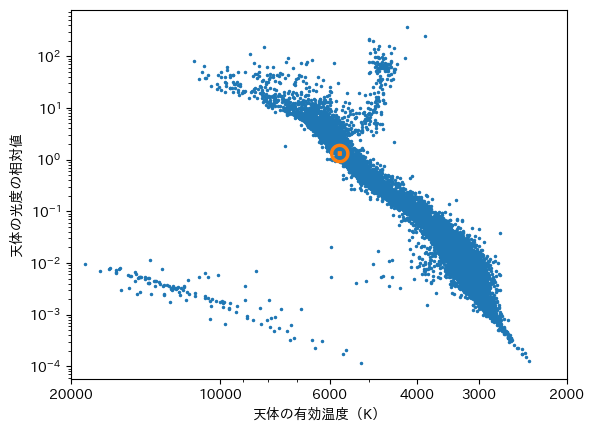

In [10]:
plt.xscale("log") # x軸を対数スケールにする
plt.yscale("log") # y軸も同様
plt.xlim(20000, 2000) # こうすると勝手に軸の左右も逆になる。左側を高温にとるのは天文学の慣習。
plt.plot(teff, L, '.', markersize=3)
plt.xlabel("天体の有効温度（K）") # ラベルには物理量と必要があれば単位も書く
plt.ylabel("天体の光度の相対値") # これは相対値なので単位は不要
plt.xticks([2e4, 1e4, 6e3, 4e3, 3e3, 2e3], [20000, 10000, 6000, 4000, 3000, 2000]) # x軸の目盛の表記を変更（一つ目の引数が位置、二つ目が変更した表記）
plt.plot(teff_sun, L_sun, '.', marker='$\odot$',  # マーカーには太陽のシンボルを使ってみた
         markersize=15, color='C1');

太陽が乗っている左上から右下に伸びる集団を主系列星 main-sequence star という（解説は次回）。図の左下にも系列が見えるが、これらの天体は主系列星とどのように性質が異なるか考えてみよう。

シュテファン・ボルツマンの法則より、天体の光度は、表面温度の4乗（面積あたりの放射エネルギー）と表面積の積で与えられる。よって天体の波形を$R$とすると
$$
L \propto R^2 T^4
$$
である。図の左下の天体は、太陽その他の主系列星より高温で$T$が大きいにもかかわらず光度$L$が小さい（暗い）。ということは、半径$R$がすごく小さいということである。定量的には、上の式から
$$
R \propto {\sqrt{L} \over T^2}
$$
なので光度を半径に換算することができる。やってみよう。

In [11]:
R = np.sqrt(L/L_sun) / (teff / teff_sun)**2

ここでは、上の式を太陽について計算したものとの比
$$
  {R \over R_\odot} = {\sqrt{L/L_\odot} \over (T/T_\odot)^2}
$$
を用いて、天体の半径の太陽と比を計算した（この形では等号になっていることに注意）。縦軸を半径でプロットしてみよう。

<ipython-input-12-fb49f6f1043d>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(teff_sun, [1], '.', marker='$\odot$',  # マーカーには太陽のシンボルを使ってみた


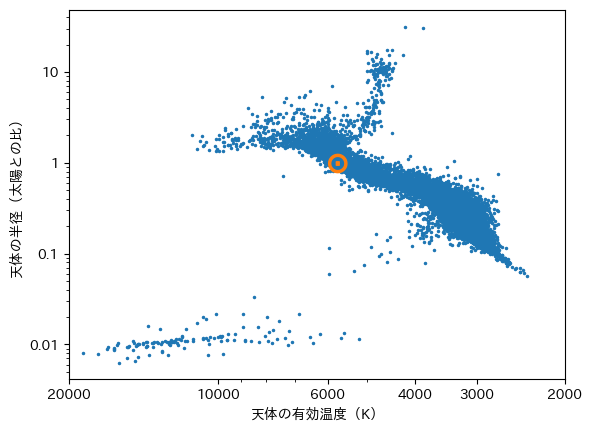

In [12]:
plt.xscale("log")
plt.yscale("log")
plt.xlim(20000, 2000) # こうすると勝手に左が大きくなる。左側を高温にとるのは天文学の慣習。
plt.plot(teff, R, '.', markersize=3)
plt.plot(teff_sun, [1], '.', marker='$\odot$',  # マーカーには太陽のシンボルを使ってみた
         markersize=15, color='C1')
plt.xlabel("天体の有効温度（K）") # ラベルには物理量と必要があれば単位も書く
plt.ylabel("天体の半径（太陽との比）"); # これは相対値なので単位は不要
plt.xticks([2e4, 1e4, 6e3, 4e3, 3e3, 2e3], [20000, 10000, 6000, 4000, 3000, 2000])
plt.yticks([1e1, 1e0, 1e-1, 1e-2], [10, 1, 0.1, 0.01]);

左下の天体は地球（おおよそ太陽の1/100）と同程度の大きさであることがわかる。これらの天体は[白色矮星](https://ja.wikipedia.org/wiki/白色矮星)と呼ばれている。